In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

from main_single_pole_cc import main_source as main_single_cc
from main_single_pole_transfer import main_source as main_single_transfer
from main_single_pole_bandit import main_source as main_single_bandit

from utils.visualization_tools import *

from evolution.chromosome import *
from utils.data_manipulators import *

# %matplotlib notebook

In [2]:
def get_fitness(results):
    fitnesses = np.zeros_like(results)
    for i, rep in enumerate(results):
        for j, gen in enumerate(rep):
            if gen.any() is not None:
                fitnesses[i, j, :] = Chromosome.fitness_to_numpy(gen)
    return fitnesses

def time_concat(time_hist):
    for i in range(1, len(time_hist)):
        time_hist[i] += time_hist[i-1]
    return time_hist

SRC_SHAPES = ['-v', '-^', '-<', '-D']
TARGET_SHAPE = '-o'
SRC_COLORS = ['#00a8ff', '#9c88ff', '#fbc531' ,'#4cd137', '#487eb0', '#f368e0', '#ff9f43', '#ee5253', '#0abde3']
TARGET_COLOR = '#10ac84'
src_poles_length = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775]

def plot_average_learning_curves(func_evals, coefficients, probs=False, last_show_num=8):
    solved_indices = np.array(func_evals) != None
    c = np.array(coefficients)[solved_indices, :]
    print(c.shape)
    plt.figure()
 
    for j, src_len in enumerate(src_poles_length):
        if j > (13-last_show_num):
            plot_mean_std(c[:, :,j]/c.sum(axis=2), SRC_COLORS[last_show_num-j], r'$e_{' + str(src_len) + r'}$' + ' (Source {})'.format(j+1), SRC_SHAPES[last_show_num-j])
#     if not probs:
#         plot_mean_std(c[:, :,13]/c.sum(axis=2), TARGET_COLOR,  r'$e_{' + str(args.target_len) + r'}$' + ' (Target)', TARGET_SHAPE)
    if not probs:
        design_plot('g', y_label='c')
    else:
        design_plot('g', y_label='p')

        
def to_right_gen(inp):
    new_inp = np.zeros((inp.shape[0], 100, inp.shape[2]))
    for i in range(100):
        
        if i%2 ==0 and int(i/2)<inp.shape[1]:
            new_inp[:, i, :] = inp[:, int(i/2), :]
        else:
            new_inp[:, i, :] = new_inp[:, i-1, :]
    return new_inp

In [12]:
src_poles_length = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775]
target_pole_len = 0.825
main_single_transfer(src_poles_length, target_pole_len, reps=2, gen=100)

---------------------- source model loaded (length: 0.1) ---------------------
---------------------- source model loaded (length: 0.2) ---------------------
---------------------- source model loaded (length: 0.3) ---------------------
---------------------- source model loaded (length: 0.4) ---------------------
---------------------- source model loaded (length: 0.5) ---------------------
---------------------- source model loaded (length: 0.55) ---------------------
---------------------- source model loaded (length: 0.6) ---------------------
---------------------- source model loaded (length: 0.65) ---------------------
---------------------- source model loaded (length: 0.675) ---------------------
---------------------- source model loaded (length: 0.7) ---------------------
---------------------- source model loaded (length: 0.725) ---------------------
---------------------- source model loaded (length: 0.75) ---------------------
---------------------- source model loaded (l

Generation 29 best fitness = 13.760000
cfitness mean:  1.4175999999999973
Generation 30 best fitness = 13.760000
Generation 31 best fitness = 13.760000
cfitness mean:  1.4439999999999962
Generation 32 best fitness = 13.760000
Generation 33 best fitness = 13.760000
cfitness mean:  1.1639999999999977
Generation 34 best fitness = 13.760000
Generation 35 best fitness = 13.760000
cfitness mean:  1.0875999999999997
Generation 36 best fitness = 13.760000
Generation 37 best fitness = 13.760000
cfitness mean:  1.1571999999999987
Generation 38 best fitness = 13.760000
Generation 39 best fitness = 13.760000
cfitness mean:  1.2479999999999982
Generation 40 best fitness = 13.760000
Generation 41 best fitness = 13.760000
cfitness mean:  1.164799999999999
Generation 42 best fitness = 13.760000
Generation 43 best fitness = 13.760000
cfitness mean:  1.0991999999999988
Generation 44 best fitness = 13.760000
Generation 45 best fitness = 13.760000
cfitness mean:  1.3759999999999932
Generation 46 best fitn

In [3]:
fitness_hist, alpha, fitness_time, func_eval_nums = Tools.load_from_file('single_transfer_pole_outcome')
solved_indices = np.array(func_eval_nums) != None
solved_instances = np.array(func_eval_nums)[solved_indices]
print('Min Function Evaluations: {}'.format(np.min(solved_instances)))
print('Max Function Evaluations: {}'.format(np.max(solved_instances)))
print('Average Function Evaluations: {}'.format(np.mean(solved_instances)))
print('STD Function Evaluations: {}'.format(np.std(solved_instances)))
print('Solutions found: {}/{}'.format(np.sum(solved_indices), 50))

Min Function Evaluations: 1328
Max Function Evaluations: 4875
Average Function Evaluations: 3738.6176470588234
STD Function Evaluations: 938.5718818160067
Solutions found: 34/50


(34, 100, 14)


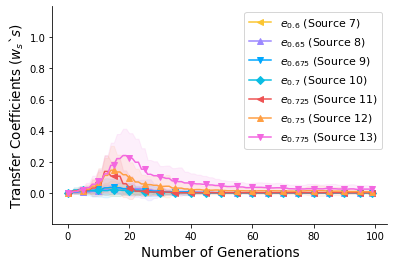

In [4]:
plot_average_learning_curves(func_eval_nums, to_right_gen(np.array(alpha).reshape(50, 49, 14)))
plt.ylim(-0.2, 1.2)
plt.yticks([0, .2, .4, .6, .8, 1.])
save_plot('plots/doublepole/AMTEA-learning.pdf')

In [5]:
## src_poles_length = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775]
target_pole_len = 0.825
main_single_bandit(src_poles_length, target_pole_len, reps=2, gen=100)

---------------------- source model loaded (length: 0.1) ---------------------
---------------------- source model loaded (length: 0.2) ---------------------
---------------------- source model loaded (length: 0.3) ---------------------
---------------------- source model loaded (length: 0.4) ---------------------
---------------------- source model loaded (length: 0.5) ---------------------
---------------------- source model loaded (length: 0.55) ---------------------
---------------------- source model loaded (length: 0.6) ---------------------
---------------------- source model loaded (length: 0.65) ---------------------
---------------------- source model loaded (length: 0.675) ---------------------
---------------------- source model loaded (length: 0.7) ---------------------
---------------------- source model loaded (length: 0.725) ---------------------
---------------------- source model loaded (length: 0.75) ---------------------
---------------------- source model loaded (l

Mixture coefficients: [1.68683945e-05 9.99983132e-01]
cfitness mean:  2.6763999999999832
Generation 74 best fitness = 2000.000000
1999.999999998326
Generation 75 best fitness = 2000.000000
1999.999999998326
Mixture coefficients: [0.00379671 0.99620329]
cfitness mean:  1.9099999999999913
Generation 76 best fitness = 2000.000000
1999.999999998326
Generation 77 best fitness = 2000.000000
1999.999999998326
Mixture coefficients: [0.0052637 0.9947363]
cfitness mean:  2.5603999999999796
Generation 78 best fitness = 2000.000000
1999.999999998326
Generation 79 best fitness = 2000.000000
1999.999999998326
Mixture coefficients: [0.00375407 0.99624593]
cfitness mean:  2.3767999999999843
Generation 80 best fitness = 2000.000000
1999.999999998326
Generation 81 best fitness = 2000.000000
1999.999999998326
Mixture coefficients: [0.00531833 0.99468167]
cfitness mean:  1.9859999999999913
Generation 82 best fitness = 2000.000000
1999.999999998326
Generation 83 best fitness = 2000.000000
1999.999999998326

Generation 59 best fitness = 8.880000
8.879999999999855
Mixture coefficients: [0.0032313 0.9967687]
cfitness mean:  1.4835999999999958
Generation 60 best fitness = 8.880000
8.879999999999855
Generation 61 best fitness = 8.880000
8.879999999999855
Mixture coefficients: [0.00557923 0.99442077]
cfitness mean:  2.1775999999999867
Generation 62 best fitness = 8.880000
8.879999999999855
Generation 63 best fitness = 10.080000
10.07999999999983
Mixture coefficients: [0.00205063 0.99794937]
cfitness mean:  2.00679999999999
Generation 64 best fitness = 10.080000
10.07999999999983
Generation 65 best fitness = 18.560000
18.5600000000001
Mixture coefficients: [0.00721803 0.99278197]
cfitness mean:  1.9323999999999908
Generation 66 best fitness = 18.560000
18.5600000000001
Generation 67 best fitness = 18.560000
18.5600000000001
Mixture coefficients: [0.00429211 0.99570789]
cfitness mean:  1.6975999999999953
Generation 68 best fitness = 18.560000
18.5600000000001
Generation 69 best fitness = 18.56000

In [5]:
fitness_hist, alpha, fitness_time, func_eval_nums, prob = Tools.load_from_file('single_bandit_pole_outcome')
solved_indices = np.array(func_eval_nums) != None
solved_instances = np.array(func_eval_nums)[solved_indices]
print('Min Function Evaluations: {}'.format(np.min(solved_instances)))
print('Max Function Evaluations: {}'.format(np.max(solved_instances)))
print('Average Function Evaluations: {}'.format(np.mean(solved_instances)))
print('STD Function Evaluations: {}'.format(np.std(solved_instances)))
print('Solutions found: {}/{}'.format(np.sum(solved_indices), 50))
# print('Solutions found: {}/{}'.format(np.sum(sols_found), 50))

Min Function Evaluations: 2084
Max Function Evaluations: 4917
Average Function Evaluations: 4156.142857142857
STD Function Evaluations: 971.8586652935305
Solutions found: 7/50


In [6]:
src_poles_length = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775]
target_pole_len = 0.825
main_single_cc(src_poles_length, target_pole_len, reps=2, gen=100)

---------------------- source model loaded (length: 0.1) ---------------------
---------------------- source model loaded (length: 0.2) ---------------------
---------------------- source model loaded (length: 0.3) ---------------------
---------------------- source model loaded (length: 0.4) ---------------------
---------------------- source model loaded (length: 0.5) ---------------------
---------------------- source model loaded (length: 0.55) ---------------------
---------------------- source model loaded (length: 0.6) ---------------------
---------------------- source model loaded (length: 0.65) ---------------------
---------------------- source model loaded (length: 0.675) ---------------------
---------------------- source model loaded (length: 0.7) ---------------------
---------------------- source model loaded (length: 0.725) ---------------------
---------------------- source model loaded (length: 0.75) ---------------------
---------------------- source model loaded (l

KeyboardInterrupt: 

In [7]:
fitness_hist, genes_list, fitness_time, func_eval_nums = Tools.load_from_file('single_cc_pole_outcome')
solved_indices = np.array(func_eval_nums) != None
solved_instances = np.array(func_eval_nums)[solved_indices]
print('Min Function Evaluations: {}'.format(np.min(solved_instances)))
print('Max Function Evaluations: {}'.format(np.max(solved_instances)))
print('Average Function Evaluations: {}'.format(np.mean(solved_instances)))
print('STD Function Evaluations: {}'.format(np.std(solved_instances)))
print('Solutions found: {}/{}'.format(np.sum(solved_indices), 50))
# print('Solutions found: {}/{}'.format(np.sum(sols_found), 50))

Min Function Evaluations: 988
Max Function Evaluations: 4992
Average Function Evaluations: 3108.285714285714
STD Function Evaluations: 993.2783690221725
Solutions found: 35/50


(35, 100, 14)


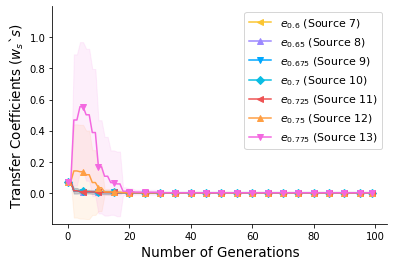

In [8]:
plot_average_learning_curves(func_eval_nums, to_right_gen(np.array(genes_list)))
plt.ylim(-0.2, 1.2)
plt.yticks([0, .2, .4, .6, .8, 1.])
save_plot('plots/doublepole/CMTEA-learning.pdf')